In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [30]:
drunkdrive = pd.DataFrame.from_csv('drunkdrive.csv', index_col=None)
drinkaw = pd.DataFrame.from_csv('drinkaw.csv', index_col=None)
drinkaw=drinkaw[drinkaw.Year==2012]
drinkaw=drinkaw.drop('Year',1)

In [41]:
df=pd.merge(drunkdrive,drinkaw, how='left')
df.head()

,Country,Female,Male,Aware
0,Afghanistan,0.2,1.4,No
1,Albania,3.3,10.5,Yes
2,Algeria,0.1,0.4,No
3,Andorra,NaN,NaN,Yes
4,Angola,5.3,21.3,Yes


In [42]:

df1=df[((df.Female.notnull())|(df.Male.notnull())|(df.Aware.notnull()))]

In [57]:
df1['All']=df1.Female+df1.Male

In [58]:
df1=df1[df1.All.notnull()]
df1=df1[df1.Aware.notnull()]

In [59]:
df1=df1[df1.All<=100]

In [60]:
df1.head()

,Country,Female,Male,Aware,All
0,Afghanistan,0.2,1.4,No,1.6
1,Albania,3.3,10.5,Yes,13.8
2,Algeria,0.1,0.4,No,0.5
4,Angola,5.3,21.3,Yes,26.6
6,Argentina,4.3,12.5,Yes,16.8


Hypotheis testing for difference in mean % of road accidents in countries with and without drunk driving awareness. 

In [61]:
dfy=df1[df1.Aware=='Yes']
dfya=dfy['All']
dfn=df1[df1.Aware=='No']
dfna=dfn['All']

In [62]:
stats.ttest_ind(dfya,dfna, equal_var = False)

(2.5670956007970016, 0.013100871296564629)

In [63]:
dfym=np.mean(dfy["All"])
s1=np.std(dfy["All"])
dfnm=np.mean(dfn["All"])
s2=np.std(dfn["All"])
se = np.sqrt(((s1**2)/(len(dfy))) + ((s2**2)/(len(dfn))) )

In [64]:
cir=((dfym-dfnm)+((1.96)*se))
cil=((dfym-dfnm)-((1.96)*se))
print cil, cir

2.48803915404 17.7146247804


**There is a significant difference between alcohol attributable road accident deaths(%) on an average among countries with awareness on drunk driving & those without.
It turns out road accidents are 2.4%-17% more where countries have awareness on drunken driving.**

Hypotheis testing for difference in mean % of road accidents among females in countries with and without drunk driving awareness. 

In [22]:
df1=df[df.Female.notnull()]

In [23]:
dfy=df1[df1.Aware=='Yes']
dfya=dfy['Female']
dfn=df1[df1.Aware=='No']
dfna=dfn['Female']

In [24]:
stats.ttest_ind(dfya,dfna, equal_var = False)

(1.471400227292333, 0.14692149769056054)

In [27]:
dfym=np.mean(dfy["Female"])
s1=np.std(dfy["Female"])
dfnm=np.mean(dfn["Female"])
s2=np.std(dfn["Female"])
se = np.sqrt(((s1**2)/(len(dfy))) + ((s2**2)/(len(dfn))) )

-0.798194839277 5.86425174985


There is no significant difference between alcohol attributable road accident deaths(%) among females on an average among countries with awareness on drunk driving & those without.

Hypotheis testing for difference in mean % of road accidents among females in countries with and without drunk driving awareness. 

In [29]:
df1=df[df.Male.notnull()]

In [30]:
dfy=df1[df1.Aware=='Yes']
dfya=dfy['Male']
dfn=df1[df1.Aware=='No']
dfna=dfn['Male']

In [31]:
stats.ttest_ind(dfya,dfna, equal_var = False)

(3.3253104392437391, 0.0015325199076904731)

In [34]:
dfym=np.mean(dfy["Male"])
s1=np.std(dfy["Male"])
dfnm=np.mean(dfn["Male"])
s2=np.std(dfn["Male"])
se = np.sqrt(((s1**2)/(len(dfy))) + ((s2**2)/(len(dfn))) )

In [35]:
cir=((dfym-dfnm)+((1.96)*se))
cil=((dfym-dfnm)-((1.96)*se))
print cil, cir

3.42949257365 12.9836171824


There is significant difference between alcohol attributable road accident deaths(%) among males on an average among countries with awareness on drunk driving & those without.It turns out road accidents are 3.4%-13% more where countries have awareness on drunken driving.

Testing hypothesis to check if there is significant difference in mean alcohol related road accidents between males and females

In [42]:
dfm=df1['Male']
dff=df1['Female']

In [44]:
stats.ttest_ind(dfm,dff, equal_var = False)

(7.9658115478335354, 5.376395765906975e-14)

In [45]:
dfmm=np.mean(df1["Male"])
s1=np.std(df1["Male"])
dffm=np.mean(df1["Female"])
s2=np.std(df1["Female"])
se = np.sqrt(((s1**2)/(len(dfy))) + ((s2**2)/(len(dfn))) )

In [46]:
cir=((dfmm-dffm)+((1.96)*se))
cil=((dfmm-dffm)-((1.96)*se))
print cil, cir

6.76656262225 14.6594114037


**There is a significant difference between alcohol attributable road accident deaths(%) on an average between males and females**

Hypotheis testing for difference in mean % of road accidents in countries(without ban on alcohol) with and without drunk driving awareness. 

In [55]:
alcban = pd.DataFrame.from_csv('alcban.csv', index_col=None)


In [65]:
new=pd.merge(df1,alcban, how='left')
new['ban']=new[new.columns[5]]
new=new[new.ban=='No']



In [35]:
dfy=new[new.Aware=='Yes']
dfya=dfy['All']
dfn=new[new.Aware=='No']
dfna=dfn['All']


In [36]:
stats.ttest_ind(dfya,dfna, equal_var = False)

(1.9602574791163967, 0.056463986983569969)

In [37]:
dfym=np.mean(dfy["All"])
s1=np.std(dfy["All"])
dfnm=np.mean(dfn["All"])
s2=np.std(dfn["All"])
se = np.sqrt(((s1**2)/(len(dfy))) + ((s2**2)/(len(dfn))) 

In [40]:
cir=((dfym-dfnm)+((1.96)*se))
cil=((dfym-dfnm)-((1.96)*se))
print cil, cir

0.126188481635 16.5225128171


There is no significant difference between alcohol attributable road accident deaths(%) on an average among countries (without ban on alcohol) with awareness on drunk driving & those without.

In [66]:
dfy=new[new.Aware=='Yes']
dfya=dfy['Female']
dfn=new[new.Aware=='No']
dfna=dfn['Female']


In [67]:
stats.ttest_ind(dfya,dfna, equal_var = False)

(0.89543967879642061, 0.37580663193441466)

In [69]:
dfy=new[new.Aware=='Yes']
dfya=dfy['Male']
dfn=new[new.Aware=='No']
dfna=dfn['Male']

In [70]:
stats.ttest_ind(dfya,dfna, equal_var = False)

(2.5463311829522031, 0.014259490285817217)

Hypothesis testing to check for difference in proportion in drunk drive awareness among countries where road accident percentage is high

In [42]:
less=df1[df1.All<=20]
more=df1[df1.All>20]
n1=float(len(less[less.Aware=='Yes']))
n2=float(len(more[more.Aware=='Yes']))
p1=(n1/len(less))
p2=n2/len(more)
print p1,p2

0.733333333333 0.875


In [43]:
p = (((p1 * len(less)) + (p2 * len(more))) / (len(less) + len(more)))
p

0.7922077922077922

In [44]:
se=np.sqrt((p*(1-p))/(len(less) + len(more)))
se

0.032694433992817483

In [45]:
me=1.96*se

In [54]:
ptest=(p1-p2)/se
cil=ptest-me
cir=ptest+me
print ptest
print cil , cir


-4.33305151261
-4.39713260324 -4.26897042199


In [55]:
from scipy.stats.distributions import norm
pvalue = 2*norm.cdf(-np.abs(ptest))
pvalue

1.4705668364160546e-05

There is significant diff in proportions of countries having and not having drunk drive awareness among countries where avg % of road accidents are than less than 20% compared to countries with more than 20% of avg road accidents. With 95% confidence we can say proportion of countries with drunk drive awareness is 4.26% -4.39% higherin countries with more than 20% of avg alcohol related road accidents compared to countries with less than 20% of avg alcohol related road accidents

hypothesis testing for difference in mean consumption among males and females

In [2]:
alcintk = pd.DataFrame.from_csv('alcintk.csv', index_col=None)

In [88]:
len(alcintk)

193

In [3]:
f=alcintk[alcintk.Female.notnull()]
f=f['Female'].str.split().str[0]
m=alcintk[alcintk.Female.notnull()]
m=m['Male'].str.split().str[0]
alcintk['f']=f
alcintk['m']=m
alcintk['f']=alcintk.f.astype(float)
alcintk.m=alcintk.m.astype(float)


In [28]:
alcintk=alcintk[(alcintk.f.notnull())&(alcintk.m.notnull())]
f=alcintk['f']
m=alcintk['m']
stats.ttest_ind(f,m, equal_var = False)


(-15.030943937350068, 1.1693401410208349e-38)

In [120]:
fm=np.mean(f)
s1=np.std(f)
mm=np.mean(m)
s2=np.std(m)
se = np.sqrt(((s1**2)/(len(f))) + ((s2**2)/(len(m))) )

In [121]:
cir=((fm-mm)+((1.96)*se))
cil=((fm-mm)-((1.96)*se))
print cil, cir

-25.5254286798 -19.6502326958


There is significant difference between average daily alcohol consumption between males and females.
Average daily alcohol consumption among females is 19.65gms-25.5gms less than that of males. 

checking relation between avg daily consumption and alcohol related road accidents

in females

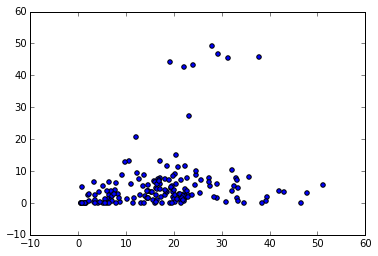

In [53]:

plt.scatter(x=alcintk.f,y=df1.Female)
plt.show()

In [136]:
np.mean(f)

17.8037037037037

In [148]:
less=alcintk[alcintk.f<=18]
more=alcintk[alcintk.f>18]

In [149]:
less=less[['Country']]
more=more[['Country']]

In [155]:
lessacc=pd.merge(less,drunkdrive,on='Country')
moreacc=pd.merge(more,drunkdrive,on='Country')
lessaccf=lessacc[lessacc.Female.notnull()]
moreaccf=moreacc[moreacc.Female.notnull()]


In [157]:
stats.ttest_ind(lessaccf.Female,moreaccf.Female, equal_var = False)

(-4.4292892329092179, 2.430808885790147e-05)

In [166]:
lessaccfm=np.mean(lessaccf["Female"])
s1=np.std(lessaccf["Female"])
moreaccfm=np.mean(moreaccf["Female"])
s2=np.std(moreaccf["Female"])
se = np.sqrt(((s1**2)/(len(lessaccf))) + ((s2**2)/(len(moreaccf))) )

In [167]:
cir=((lessaccfm-moreaccfm)+((1.96)*se))
cil=((lessaccfm-moreaccfm)-((1.96)*se))
print cil, cir

-8.28325713248 -3.2214847306


**There is significant difference in alcohol related road accidents my females who on an average consume less then 18gms of alcohol daily than those who consume more than 18gms.
Females who consume on an average more than 18gms of alcohol daily have 3.2% to 8.2% more chances of alcohol related road accidents**

in males

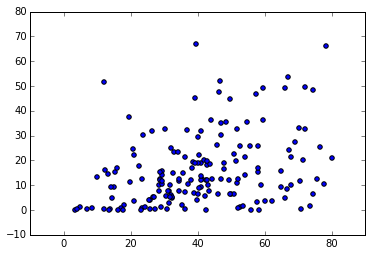

In [54]:
plt.scatter(x=alcintk.m,y=df1.Male)
plt.show()

In [172]:
np.mean(m)

40.391534391534385

In [173]:
less=alcintk[alcintk.f<=40]
more=alcintk[alcintk.f>40]
less=less[['Country']]
more=more[['Country']]

In [174]:
lessacc=pd.merge(less,drunkdrive,on='Country')
moreacc=pd.merge(more,drunkdrive,on='Country')
lessaccm=lessacc[lessacc.Male.notnull()]
moreaccm=moreacc[moreacc.Male.notnull()]

In [175]:
stats.ttest_ind(lessaccm.Male,moreaccm.Male, equal_var = False)

(0.6840659250617076, 0.51612240594865411)

In [176]:
lessaccmm=np.mean(lessaccm["Male"])
s1=np.std(lessaccm["Male"])
moreaccmm=np.mean(moreaccm["Male"])
s2=np.std(moreaccm["Male"])
se = np.sqrt(((s1**2)/(len(lessaccm))) + ((s2**2)/(len(moreaccm))) )

In [177]:
cir=((lessaccmm-moreaccmm)+((1.96)*se))
cil=((lessaccmm-moreaccmm)-((1.96)*se))
print cil, cir

-3.3045811689 7.30171818321


**There is no significant difference in alcohol related road accidents my males who on an average consume less then 40gms of alcohol daily than those who consume more than 40gms.**

# Findings

There is a significant difference between alcohol attributable road accident deaths(%) on an average of males and females

There is a significant difference between alcohol attributable road accident deaths(%) on an average among countries with awareness on drunk driving & those without.
It turns out road accidents are 2.4%-17% more where countries have awareness on drunken driving.(with 95% confidence)

There is no significant difference between alcohol attributable road accident deaths(%) among females on an average among countries with awareness on drunk driving & those without.

There is significant difference between alcohol attributable road accident deaths(%) in males on an average among countries with awareness on drunk driving & those without.It turns out road accidents are 3.4%-13% more where countries have awareness on drunken driving.(with 95% Confidence)

There is no significant difference between alcohol attributable road accident deaths(%) on an average among countries (without ban on alcohol) with awareness on drunk driving & those without.

There is no significant difference between alcohol attributable road accident deaths(%) on an average among females in countries (without ban on alcohol) with awareness on drunk driving & those without.

There is significant difference between alcohol attributable road accident deaths(%) on an average among males in countries (without ban on alcohol) with awareness on drunk driving & those without.

There is significant diff in proportions of countries having and not having drunk drive awareness among countries where avg % of road accidents are than less than 20% compared to countries with more than 20% of avg road accidents. With 95% confidence we can say proportion of countries with drunk drive awareness is 4.26% -4.39% higher in countries with more than 20% of avg alcohol related road accidents compared to countries with less than 20% of avg alcohol related road accidents

There is significant difference in alcohol related road accidents my females who on an average consume less then 18gms of alcohol daily than those who consume more than 18gms.With 95% confidence we can say Females who consume on an average more than 18gms of alcohol daily have 3.2% to 8.2% more chances of alcohol related road accidents..(18gms is the mean daily consumption among females)

There is no significant difference in alcohol related road accidents my males who on an average consume less then 40gms of alcohol daily than those who consume more than 40gms...(40gms is the mean daily consumption among males)

There is significant difference between average daily alcohol consumption between males and females.With 95% confidence we can say that average daily alcohol consumption among females is 19.65gms-25.5gms less than that of males. 